# 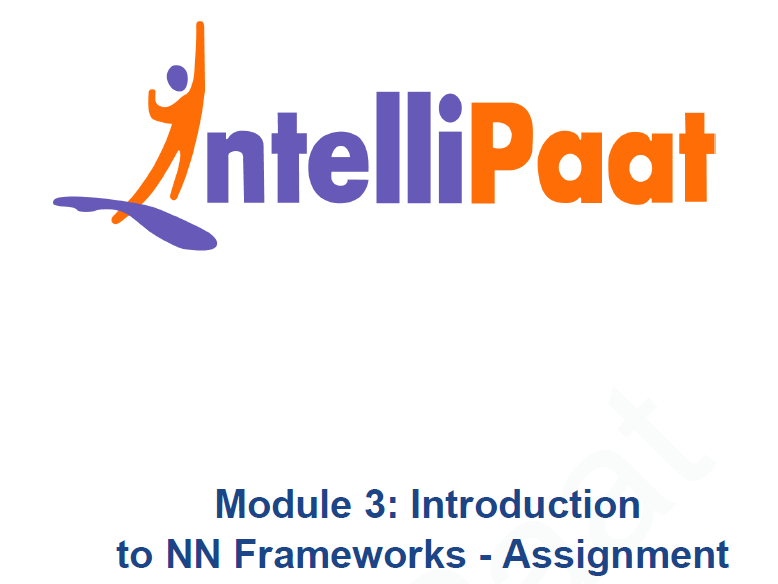

# Problem Statement:
This assignment challenges students to construct and train a neural network to accurately classify handwritten digits from the MNIST dataset. The goal is to navigate through the preprocessing of image data, select an appropriate neural network architecture, and apply optimization techniques to achieve high classification accuracy.
# Introduction:
The MNIST dataset is a large database of handwritten digits commonly used for training various image processing systems. The dataset contains 60,000 training images and 10,000 testing images, each of which is a 28x28 pixel grayscale image. The goal is to build a neural network model that can accurately classify these images into one of the ten digit classes (0 through 9).
# Objectives:
####    Data Preprocessing:  
Prepare the MNIST dataset for training and testing the neural network model. This includes normalization of image pixel values and converting the output labels to a one-hot encoded format.   
#### Model Development: 
Create a neural network model capable of classifying  28x28 pixel grayscale images of handwritten digits. The model should have an input layer, one or more hidden layers, and an output layer.  
#### Training: 
Train the neural network model using the preprocessed training data.  Utilize categorical cross-entropy as the loss function, stochastic gradient descent  as the optimizer, and track accuracy as a performance metric. 
#### Evaluation: 
Evaluate the performance of the trained model using the testing dataset, ensuring that the model generalizes well to unseen data. 
#### Prediction:
Implement functionality to make predictions on single images or batches of images, returning the digit class with the highest probability.
####  Analysis: 
Analyze the results, understand the model's performance, and explore ways to improve it if necessary.

# Challenges and Considerations:
### Class Imbalance: 
Ensure that the dataset does not have a significant class imbalance that could negatively affect the model’s performance. If imbalance is present, strategies to mitigate its effects should be considered.
### Model Complexity: 
Choose an appropriate model complexity that is capable of learning from the data without overfitting. This may involve experimenting with different numbers of layers and units, as well as regularization techniques. Activation Functions: Use appropriate activation functions in the hidden layers
(ReLU is commonly used for image data) and softmax activation in the output layer to convert logits to probabilities.
### Evaluation Metrics: 
Focus on accuracy as the primary evaluation metric, but also be open to exploring other metrics that could provide additional insights into the model’s performance.
### Hyperparameter Tuning: 
Experiment with different hyperparameters such as learning rate, batch size, and number of epochs to optimize the model’s performance.
### Predictions and Interpretability:
Provide clear and interpretable predictions,ensuring that the output probabilities are well-calibrated and meaningful.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.13.0'

# Data Preprocessing:
### Prepare the MNIST dataset for training and testing the neural network model. This includes normalization of image pixel values and converting the output labels to a one-hot encoded format.

In [3]:
# Download MNIST - it can be directly downloaded from keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
x_train.shape # Array of Training images with # num of images x height x width

(60000, 28, 28)

In [5]:
y_train.shape # Training Labels

(60000,)

In [6]:
x_test.shape # Array of testing images with #num of images x height x width

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
x_train = x_train / 255.0

In [9]:
y_train = tf.keras.utils.to_categorical(y_train)

## Model Development:


### Created a parameterised model functon get_model with option to dynamically set two hidden layers with no of nodes.  

#### Create a neural network model capable of classifying 28x28 pixel grayscale images of handwritten digits. The model should have an input layer, one or more hidden layers, and an output layer.
#### Train the neural network model using the preprocessed training data. Utilize categorical cross-entropy as the loss function, stochastic gradient descent as the optimizer, and track accuracy as a performance metric.    

In [10]:
def get_model(x, y, hl1_neuron=128, hl2_neuron=None, epoch=20, batch_size=64, lr=0.01, plot=None):

    # Create a neural network model capable of classifying 28x28 pixel grayscale images of handwritten digits. The model should have an input layer, one or more hidden layers, and an output layer.
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input((28, 28), name="Input"))
    model.add(tf.keras.layers.Flatten(name='Flat'))
    model.add(tf.keras.layers.Dense(hl1_neuron, activation=tf.keras.activations.relu, name="Hidden"))

    if hl2_neuron:
        model.add(tf.keras.layers.Dense(hl2_neuron, activation=tf.keras.activations.relu, name="Hidden2"))

    model.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax, name='Output'))
 
    # Train the neural network model using the preprocessed training data. Utilize categorical cross-entropy 
    # as the loss function, stochastic gradient descent as the optimizer, and track accuracy as a performance metric.

    model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr),
              metrics=["acc"])
    # Train the neural network model using the preprocessed training data. Utilize categorical cross-entropy as the loss function, stochastic gradient descent as the optimizer, and track accuracy as a performance metric.

#     model.fit(x=x_train, y=y_train, epochs=epoch, validation_split = 0.1, batch_size=batch_size)
    model.fit(x=x, y=y, epochs=epoch, validation_split = 0.1, batch_size=batch_size)

    score = pd.DataFrame()
    score["val_loss"] = model.history.history["val_loss"]
    score["loss"]     = model.history.history["loss"]
    score["val_acc"]  = model.history.history["val_acc"]
    score["acc"]      = model.history.history["acc"]
    
    return (model, score)

## Evaluation:
##### Evaluate the performance of the trained model using the testing dataset, ensuring that the model generalizes well to unseen data.

##### created a plot_score to plot model score

In [11]:
def plot_score(score, batch=None):    
    plt.title("Val loss Vs Loss")
    if batch:
        plt.plot(score["val_loss"], label="Val Loss "+str(batch))
        plt.plot(score["loss"], label="Loss "+str(batch))
    else:
        plt.plot(score["val_loss"], label="Val Loss")
        plt.plot(score["loss"], label="Loss")
    plt.legend()

In [12]:
(model, score) = get_model(x=x_train, y=y_train, hl1_neuron=128, epoch=10, batch_size=64, lr=0.01, plot='Y')

Epoch 1/10
844/844 [==============================] - 3s 3ms/step - loss: 0.9001 - acc: 0.7833 - val_loss: 0.4268 - val_acc: 0.8972
Epoch 2/10
844/844 [==============================] - 2s 3ms/step - loss: 0.4325 - acc: 0.8847 - val_loss: 0.3224 - val_acc: 0.9163
Epoch 3/10
844/844 [==============================] - 2s 3ms/step - loss: 0.3639 - acc: 0.8996 - val_loss: 0.2828 - val_acc: 0.9252
Epoch 4/10
844/844 [==============================] - 2s 3ms/step - loss: 0.3295 - acc: 0.9084 - val_loss: 0.2598 - val_acc: 0.9272
Epoch 5/10
844/844 [==============================] - 2s 3ms/step - loss: 0.3059 - acc: 0.9149 - val_loss: 0.2437 - val_acc: 0.9322
Epoch 6/10
844/844 [==============================] - 2s 3ms/step - loss: 0.2876 - acc: 0.9195 - val_loss: 0.2303 - val_acc: 0.9363
Epoch 7/10
844/844 [==============================] - 2s 3ms/step - loss: 0.2727 - acc: 0.9236 - val_loss: 0.2186 - val_acc: 0.9385
Epoch 8/10
844/844 [==============================] - 2s 3ms/step - loss: 0.

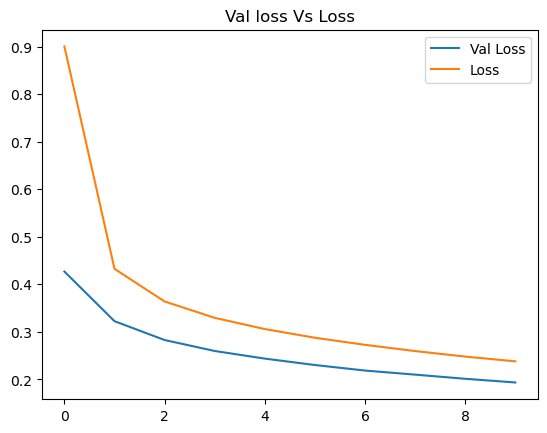

In [13]:
plot_score(score=score)

In [14]:
# run an experiment on batch_size (16, 32, 64, 128, 256, 512, 1024)
model_dict = {}
for bs in [16, 32, 64, 128, 256, 512, 1024]:
    model_dict[bs] = get_model(x=x_train, y=y_train, hl1_neuron=128, epoch=10, batch_size=bs, lr=0.01)

Epoch 1/10
3375/3375 [==============================] - 8s 2ms/step - loss: 0.5203 - acc: 0.8633 - val_loss: 0.2595 - val_acc: 0.9258
Epoch 2/10
3375/3375 [==============================] - 8s 2ms/step - loss: 0.2881 - acc: 0.9187 - val_loss: 0.2116 - val_acc: 0.9413
Epoch 3/10
3375/3375 [==============================] - 9s 3ms/step - loss: 0.2406 - acc: 0.9315 - val_loss: 0.1820 - val_acc: 0.9507
Epoch 4/10
3375/3375 [==============================] - 9s 3ms/step - loss: 0.2095 - acc: 0.9408 - val_loss: 0.1620 - val_acc: 0.9592
Epoch 5/10
3375/3375 [==============================] - 9s 3ms/step - loss: 0.1863 - acc: 0.9474 - val_loss: 0.1482 - val_acc: 0.9632
Epoch 6/10
3375/3375 [==============================] - 9s 3ms/step - loss: 0.1679 - acc: 0.9522 - val_loss: 0.1349 - val_acc: 0.9643
Epoch 7/10
3375/3375 [==============================] - 8s 2ms/step - loss: 0.1524 - acc: 0.9574 - val_loss: 0.1262 - val_acc: 0.9675
Epoch 8/10
3375/3375 [==============================] - 7s 2ms

Epoch 3/10
53/53 [==============================] - 1s 11ms/step - loss: 1.4456 - acc: 0.6847 - val_loss: 1.2600 - val_acc: 0.7543
Epoch 4/10
53/53 [==============================] - 1s 12ms/step - loss: 1.2118 - acc: 0.7343 - val_loss: 1.0515 - val_acc: 0.7963
Epoch 5/10
53/53 [==============================] - 1s 11ms/step - loss: 1.0410 - acc: 0.7677 - val_loss: 0.9009 - val_acc: 0.8202
Epoch 6/10
53/53 [==============================] - 1s 12ms/step - loss: 0.9170 - acc: 0.7919 - val_loss: 0.7911 - val_acc: 0.8440
Epoch 7/10
53/53 [==============================] - 1s 12ms/step - loss: 0.8254 - acc: 0.8102 - val_loss: 0.7093 - val_acc: 0.8585
Epoch 8/10
53/53 [==============================] - 1s 11ms/step - loss: 0.7559 - acc: 0.8236 - val_loss: 0.6467 - val_acc: 0.8683
Epoch 9/10
53/53 [==============================] - 1s 12ms/step - loss: 0.7015 - acc: 0.8343 - val_loss: 0.5976 - val_acc: 0.8750
Epoch 10/10
53/53 [==============================] - 1s 11ms/step - loss: 0.6581 - 

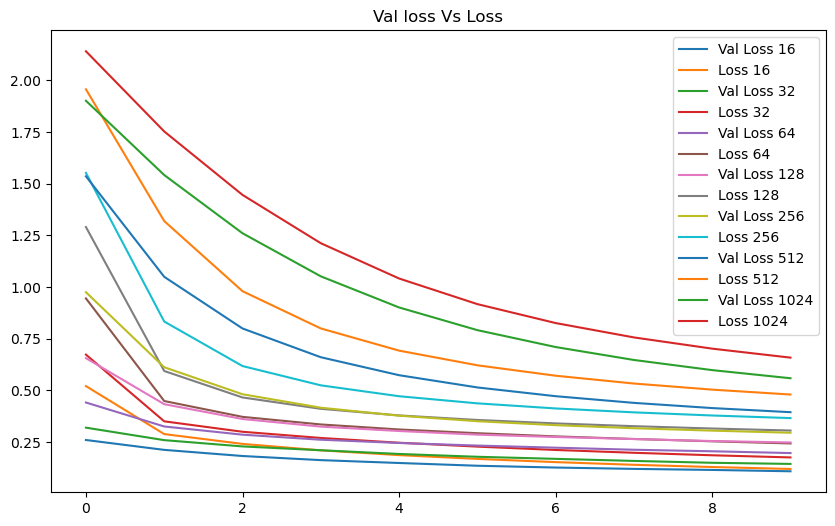

In [15]:
plt.figure(figsize=(10,6))
plt.title("Val loss Vs Loss")
for bs in [16, 32, 64, 128, 256, 512, 1024]:  
    plot_score(score=model_dict[bs][1],batch=bs)

## Prediction:
#### Implement functionality to make predictions on single images or batches of images, returning the digit class with the highest probability.

In [16]:
def get_predicted_img(model, image, actual_image_no):
    plt.imshow(image)
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    result = model.predict(image)
    result = np.argmax(result)
    plt.title(f"Actual: {actual_image_no} & Predicted: {result}")

##### Predicting single image on single model

1/1 [==============================] - 0s 91ms/step


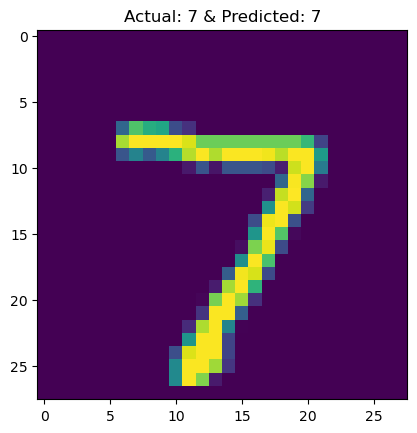

In [17]:
get_predicted_img(model=model,image=x_test[0],actual_image_no=y_test[0])

1/1 [==============================] - 0s 26ms/step


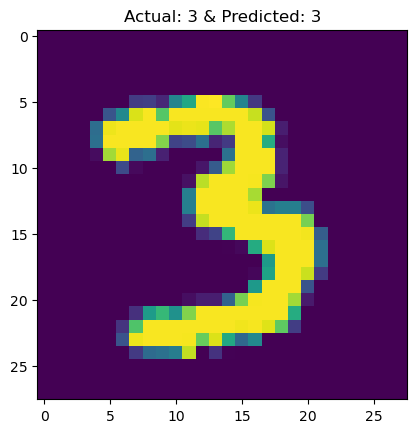

In [18]:
get_predicted_img(model=model,image=x_test[500],actual_image_no=y_test[500])

##### Predicting single image on multiple models

1/1 [==============================] - 0s 60ms/step


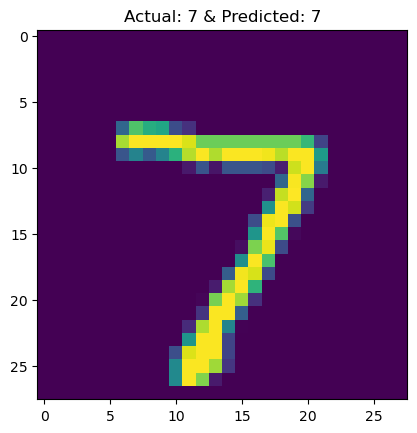

In [19]:
get_predicted_img(model=model_dict[16][0],image=x_test[0],actual_image_no=y_test[0])

1/1 [==============================] - 0s 23ms/step


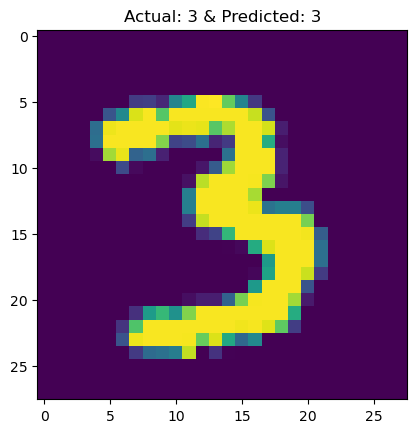

In [20]:
get_predicted_img(model=model_dict[16][0],image=x_test[500],actual_image_no=y_test[500])

1/1 [==============================] - 0s 57ms/step


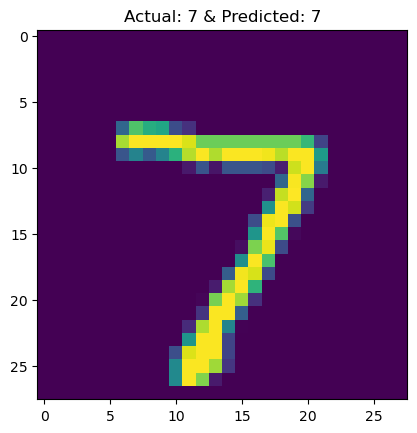

In [21]:
get_predicted_img(model=model_dict[1024][0],image=x_test[0],actual_image_no=y_test[0])

1/1 [==============================] - 0s 23ms/step


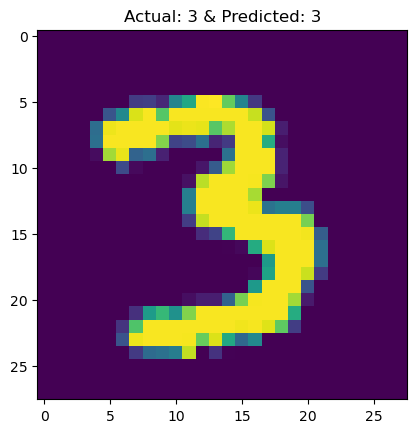

In [22]:
get_predicted_img(model=model_dict[1024][0],image=x_test[500],actual_image_no=y_test[500])